# Activity 2.1

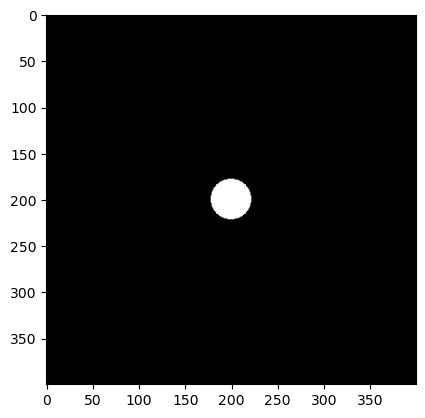

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift

N = 400                           # no. of pixels
x = np.linspace(-1,1,num = N)     # 1d
y = x                             # make same number of columns
X,Y = np.meshgrid(x,y)            # make NxN arrays
R = np.sqrt(X**2 + Y**2)          # radius/distance from center formula
A = np.zeros(np.shape(R))         # initiate empty array
A[np.where(R<0.11)] = 1.0          # change pixels within a radius to create a circle

plt.imshow(A, cmap='gray')        # since array has binary values, there will be 2 colors
# plt.imsave('whitecircl1.png', A, cmap='gray')

# FA = np.fft.fft2(A)
# plt.imshow(abs(FA), cmap='gray')

# FAshifted = np.fft.fftshift(FA)
# plt.imshow(abs(FAshifted), cmap = 'hot')
# plt.imsave('FAshiftedcircl1.png', abs(FAshifted), cmap='hot')

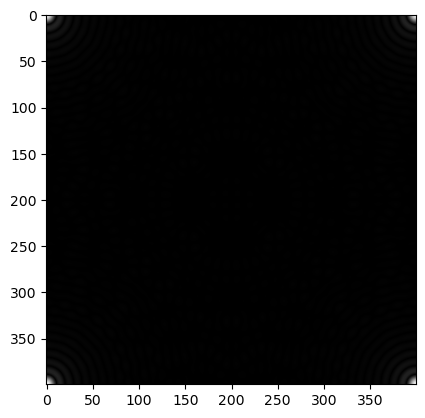

In [73]:
FA = np.fft.fft2(A)
plt.imshow(abs(FA), cmap='gray')


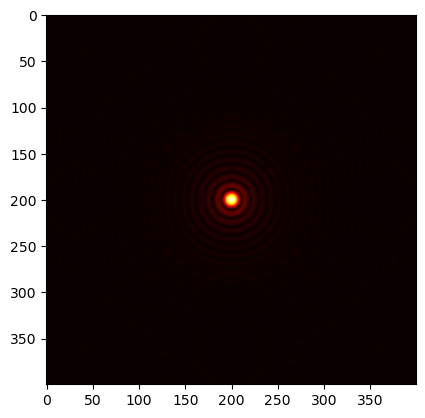

In [74]:
FAshifted = np.fft.fftshift(FA)
plt.imshow(abs(FAshifted), cmap = 'hot')
# plt.imsave('FAshiftedcircle.png', abs(FAshifted), cmap='hot')

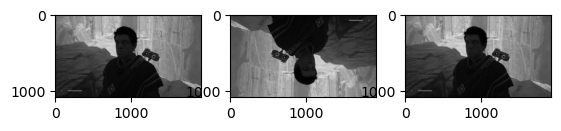

In [10]:
from numpy.fft import fft2, ifft2
import cv2
dark_img = cv2.imread('cal sith eyes.jpg')

dark_img_gray = cv2.cvtColor(dark_img, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(dark_img_gray, cmap='gray')
plt.imsave('cal.png', dark_img_gray, cmap='gray')

Irec = fft2(fft2(dark_img_gray))
plt.subplot(1,3,2)
plt.imshow(abs(Irec), cmap='gray')
plt.imsave('FFT_FFT_cal.png', abs(Irec), cmap='gray')

Irec2 = ifft2(fft2(dark_img_gray))
plt.subplot(1,3,3)
plt.imshow(abs(Irec2), cmap='gray')
plt.imsave('FFT_IFFT_cal.png', abs(Irec2), cmap='gray')

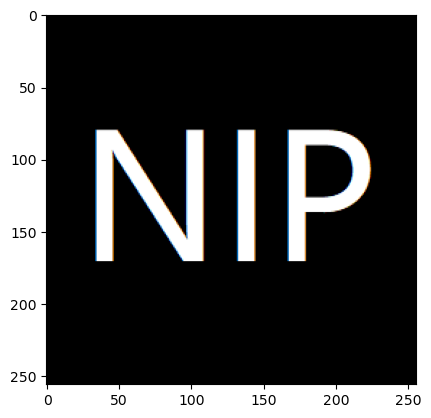

In [11]:
nip = plt.imread('NIP.tif')

plt.imshow(nip)

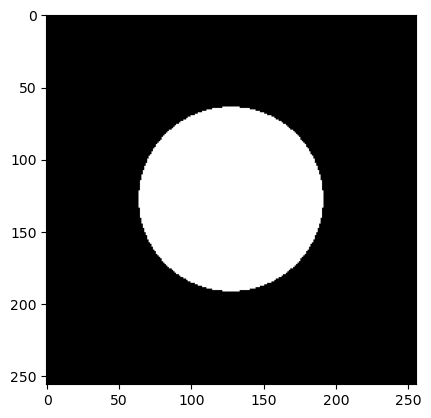

In [54]:
def circle(r):    # generate circle aperture

    N = 256
    x = np.linspace(-1,1,N)
    y = x
    X,Y = np.meshgrid(x,y)
    R = np.sqrt(X**2+Y**2)
    circle = np.zeros(np.shape(R))
    r = r/256
    circle[np.where(R<r)] = 1.0
    
    return circle

def sinusoid(f):
    N = 256
    x = np.linspace(-1,1,N)
    y = np.sin(f*2*np.pi*x)                # sin(2f*pi x) f determines frequency per unit
    X,Y = np.meshgrid(x,y)
    sinusoid = np.transpose(Y)
    return sinusoid
    
N=256
aperture = circle(N/2)
# aperture = sinusoid(4)
plt.imshow(aperture, cmap='gray')
# plt.imsave('aperture_sine.png', aperture, cmap='gray')

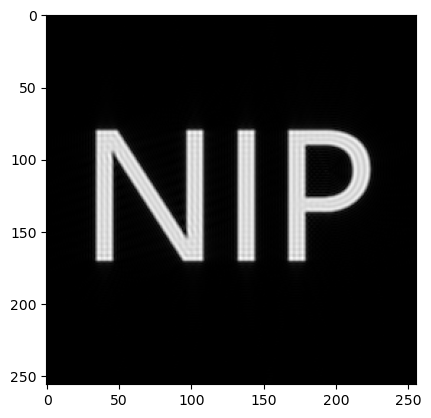

In [55]:
aperture_fftshift = fftshift(aperture)    # ftshift the aperture
nip_fft = fft2(nip[:,:,1])                    # ft the nip    
conv = nip_fft*aperture_fftshift              # multiply
conv_inv = ifft2(conv)                        # inverse ft

plt.imshow(abs(conv_inv), cmap='gray')
# plt.imsave('nip_sine.png',abs(conv_inv), cmap='gray')

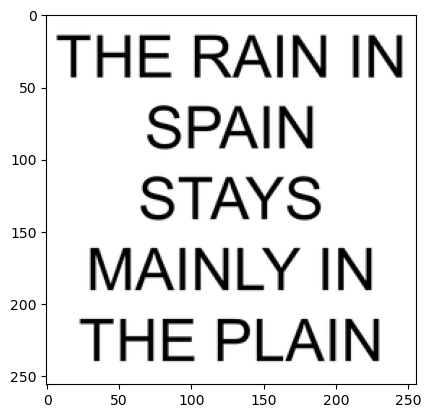

In [56]:
rain = plt.imread('rain.tif')
a = plt.imread('a.tif')
i = plt.imread('i.tif')

plt.imshow(rain, cmap='gray')

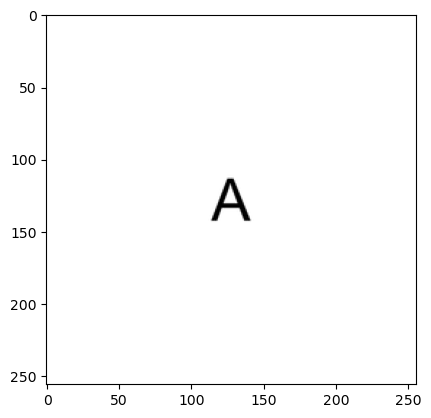

In [57]:
plt.imshow(a, cmap='gray')

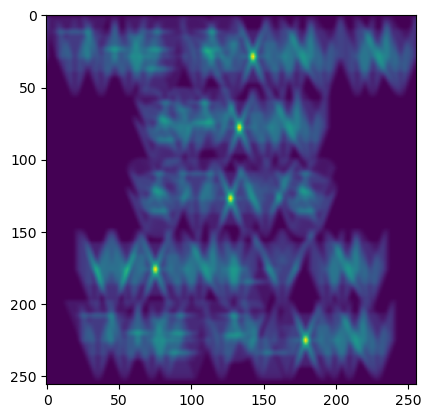

In [60]:
rain_fft2 = fft2(rain)
a_fft2 = fft2(a)
i_fft2 = fft2(i)

prod_a = np.conj(a_fft2)*rain_fft2
prod_i = np.conj(i_fft2)*rain_fft2

result_a = ifft2(prod_a)
result_i = ifft2(prod_i)

plt.imshow(fftshift(abs(result_a)))
# plt.imsave('a_locations.png',fftshift(abs(result_a)))

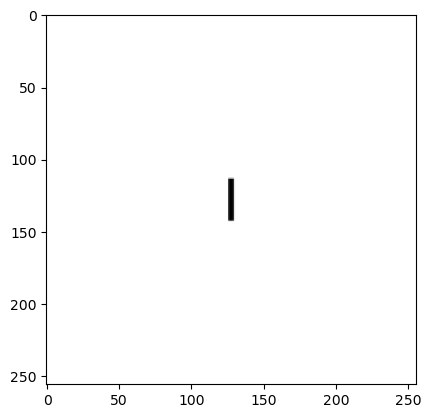

In [61]:
plt.imshow(i, cmap='gray')

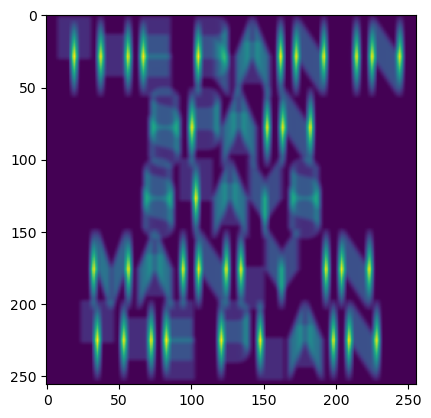

In [64]:
plt.imshow(fftshift(abs(result_i)))
# plt.imsave('i_locations.png',fftshift(abs(result_i)))